## **Cats-Dogs VGG16 with RSMProp Optimizer**

**Benedictus Bayu Pramudhito**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/My\ Drive/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [3]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

**Image Augmentation**

In [5]:
dataset_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_augmented_iteration = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_augmented_iteration = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout

In [7]:
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

fine_tuned_model.summary()

opt = RMSprop(learning_rate=0.0001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
history_deep_model = fine_tuned_model.fit_generator(train_augmented_iteration, steps_per_epoch=len(train_augmented_iteration), validation_data=test_augmented_iteration, validation_steps=len(test_augmented_iteration), epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 155s 2s/step - loss: 0.6988 - accuracy: 0.8074 - val_loss: 0.1958 - val_accuracy: 0.9179
Epoch 2/50
100/100 [==============================] - 157s 2s/step - loss: 0.2570 - accuracy: 0.8900 - val_loss: 0.1863 - val_accuracy: 0.9165
Epoch 3/50
100/100 [==============================] - 157s 2s/step - loss: 0.2258 - accuracy: 0.9020 - val_loss: 0.1654 - val_accuracy: 0.9290
Epoch 4/50
100/100 [==============================] - 156s 2s/step - loss: 0.2140 - accuracy: 0.9095 - val_loss: 0.1593 - val_accuracy: 0.9334
Epoch 5/50
100/100 [==============================] - 156s 2s/step - loss: 0.2067 - accuracy: 0.9129 - val_loss: 0.1834 - val_accuracy: 0.9307
Epoch 6/50
100/100 [==============================] - 156s 2s/step - loss: 0.2020 - accuracy: 0.9136 - val_loss: 0.1580 - val_accuracy: 0.9325
Epoch 7/50
100/100 [==============================] - 156s 2s/step

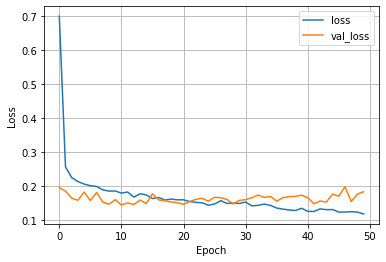

In [10]:
import matplotlib.pyplot as plt

plot_loss(history_deep_model)

In [11]:
import pandas as pd

history_dataframe = pd.DataFrame(history_deep_model.history)
history_dataframe['epoch'] = history_deep_model.epoch

In [12]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.180159,0.924386,0.145402,0.937833,10
12,0.168574,0.930975,0.146876,0.935169,12
20,0.160531,0.934818,0.147175,0.937389,20
8,0.186091,0.924073,0.147609,0.938721,8
28,0.150565,0.939289,0.148595,0.938277,28
41,0.126340,0.950035,0.148986,0.941385,41
14,0.175032,0.929249,0.149725,0.932504,14
11,0.183445,0.925092,0.151578,0.937833,11
19,0.160598,0.932387,0.152396,0.937389,19
7,0.189817,0.920307,0.153757,0.935613,7


In [14]:
history_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.124632,0.948153,0.171144,0.944494,45
49,0.119195,0.952232,0.184349,0.943606,49
44,0.132012,0.945957,0.177295,0.942274,44
47,0.125739,0.948702,0.155468,0.942274,47
43,0.131592,0.946270,0.154007,0.942274,43
39,0.135727,0.944152,0.174203,0.941830,39
33,0.147982,0.940074,0.167636,0.941830,33
40,0.126644,0.948937,0.166730,0.941830,40
41,0.126340,0.950035,0.148986,0.941385,41
36,0.133247,0.948074,0.166774,0.940941,36


**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Nilai val_accuracy tertinggi pada model berada pada epoch 45 yaitu sebesar 0.944494 akan tetapi kita harus tinjau juga berdasarkan val_lossnya. Berdasarkan grafik epoch terhadap loss pada arsitektur CNN dengan vgg16 dan image augmentation, terlihat bahwa garis loss nya terus menurun dan val_loss nya cenderung stabil dengan epoch 50. Terlihat adanya perbedaan jarak antara loss dan val_lossnya dengan 50 epoch yang kecil yang berarti model yang kita buat ini bagus. Nilai val_loss terendah diperoleh saat epochnya sekitar 10, dimana diperoleh val_loss: 0.145402 dan val_accuracy: 0.937833, sedikit lebih kecil dibanding val_accuracy tertingginya